<a href="https://colab.research.google.com/github/Chandu9391/Data-science-codes/blob/main/Decision_Tree_C5_0_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:

iris = pd.read_csv('Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species'])

In [ ]:
iris.Species.value_counts()

,count
Species,
0,50
1,50
2,50


In [ ]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [ ]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [ ]:
y

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
iris['Species'].unique()

array([0, 1, 2])

In [ ]:
iris.Species.value_counts()

,count
Species,
0,50
1,50
2,50


In [ ]:
colnames = list(iris.columns)
colnames

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [ ]:

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
62,63,6.0,2.2,4.0
23,24,5.1,3.3,1.7
26,27,5.0,3.4,1.6
48,49,5.3,3.7,1.5
2,3,4.7,3.2,1.3


In [ ]:
y_train.head()

,Species
62,1
23,0
26,0
48,0
2,0


### Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

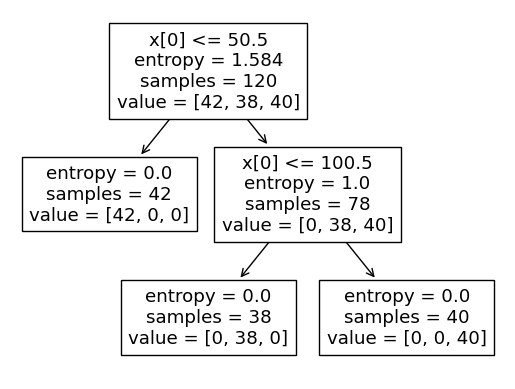

In [ ]:

tree.plot_tree(model);


In [ ]:
model.tree_.node_count

5

In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

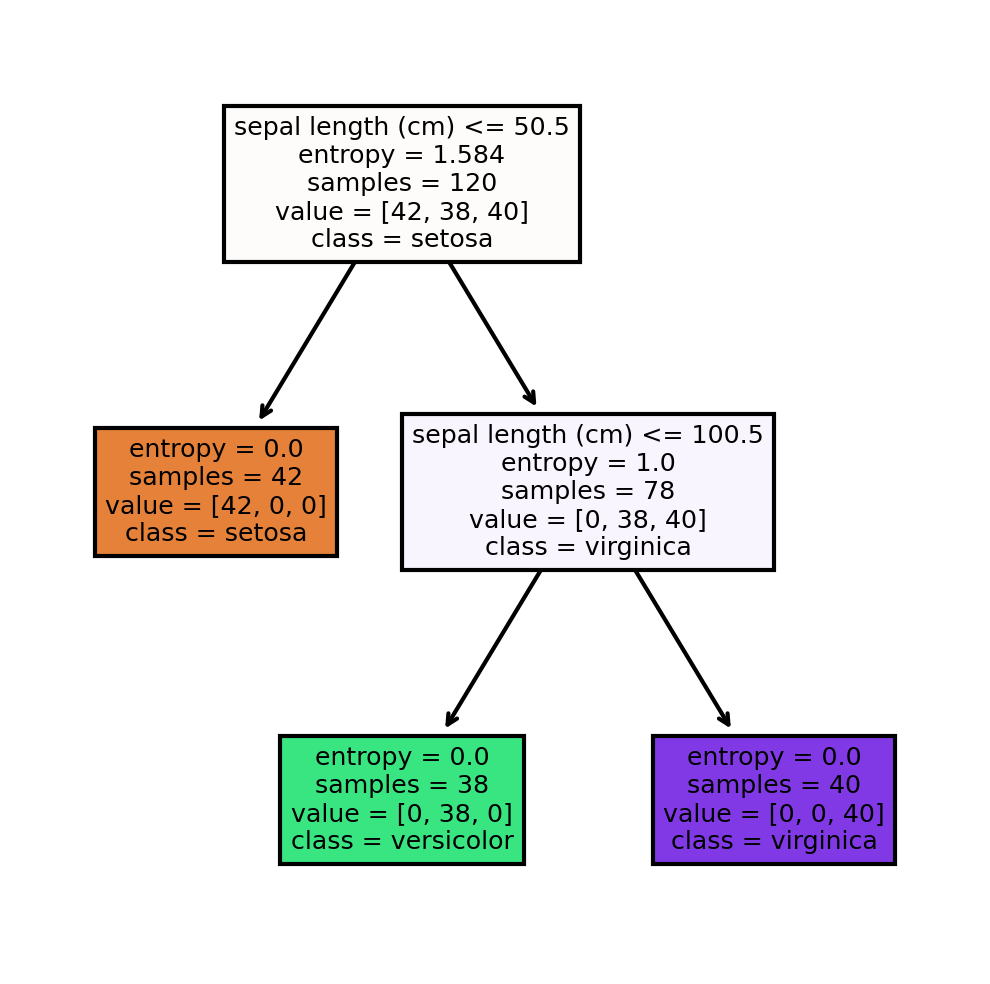

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds)

,0
0,0
1,1
2,2
3,2
4,1
5,2
6,1
7,1
8,1
9,0


In [ ]:
pd.Series(preds).value_counts()

,count
1,12
2,10
0,8


In [ ]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [ ]:
# Accuracy
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:

pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

#### Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:

model.score(X_test,y_test)

0.9621726788505087